In [1]:
import os # importing os standard library
import tensorflow as tf #importing tensorflow as tf
from tensorflow.keras import layers #importing tensorflow's callable object layers to output one or more tensors.
from tensorflow.keras import Model #importing tensorflow's model and its methods
from tensorflow.keras.optimizers import Adam # importing Adam, a gradient descent optimizing method
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Generate batches of tensor image data with real-time data augmentation.
import pandas as pd # used to read file
import numpy as np # linear algebra library
import matplotlib.pyplot as plt # function used for plotting the data.

In [2]:
# granting mounting permission for collab to access files from the Google drive.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# script to check what time of graphic card has been assigned for trainig purposes
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Nov  7 07:00:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Data Loading

In [4]:
data = pd.read_csv("/content/gdrive/MyDrive/Image Processing/asd.csv") # reading data from the .csv file using pd.

###Data Exploration

In [5]:
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32")) # formatting the data type of the pixels into floats
data.head() # prints the first 5 instances of the data frame.

,age,img_name,pixels
0,1,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [6]:
print(data["pixels"]) # prints the instances in the data frame
print(data["pixels"].shape) #prints the total number of data under pixels in the data frame.

0        [129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133...
1        [164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175....
2        [67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79....
3        [193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202...
4        [202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210...
                               ...                        
23700    [127.0, 100.0, 94.0, 81.0, 77.0, 77.0, 74.0, 9...
23701    [23.0, 28.0, 32.0, 35.0, 42.0, 47.0, 68.0, 85....
23702    [59.0, 50.0, 37.0, 40.0, 34.0, 19.0, 30.0, 101...
23703    [45.0, 108.0, 120.0, 156.0, 206.0, 197.0, 140....
23704    [156.0, 161.0, 160.0, 165.0, 170.0, 173.0, 166...
Name: pixels, Length: 23705, dtype: object
(23705,)


In [7]:
print(data["pixels"][0]) # prints the value of the first image.
print(data["pixels"][0].shape) # prints the dimension of the first image.

[129. 128. 128. ... 146. 146. 146.]
(2304,)


In [8]:
print(data["pixels"].tolist()) # change list to numpy array which will be used for training 

[array([129., 128., 128., ..., 146., 146., 146.], dtype=float32), array([164.,  74., 111., ..., 182., 170., 148.], dtype=float32), array([ 67.,  70.,  71., ..., 112., 111., 108.], dtype=float32), array([193., 197., 198., ..., 235., 239., 246.], dtype=float32), array([202., 205., 209., ..., 167., 163., 161.], dtype=float32), array([195., 198., 200., ..., 105., 119., 140.], dtype=float32), array([208., 216., 217., ..., 210., 211., 213.], dtype=float32), array([ 99., 142., 169., ...,   0.,   0.,   0.], dtype=float32), array([127., 127., 133., ..., 175., 175., 172.], dtype=float32), array([199., 211., 211., ..., 225., 210., 228.], dtype=float32), array([136., 138., 145., ..., 200., 205., 210.], dtype=float32), array([253., 253., 253., ..., 182., 182., 178.], dtype=float32), array([223., 222., 226., ..., 224., 223., 205.], dtype=float32), array([181., 185., 186., ..., 178., 184., 191.], dtype=float32), array([167., 172., 175., ..., 166., 168., 170.], dtype=float32), array([ 99., 122., 138.,

In [9]:
X = np.array(data["pixels"].tolist()) # assigning the numpy array to a variable


## Data Preparation


In [10]:
print(X.shape) # print out the dimension of the pixels
# X = X.reshape(-1,48,48,1) # another way of reshaping instances
X = X.reshape(X.shape[0],48,48,1)  
rX = X.reshape(-1,48,48)  # the data in the pixels have been flattened into 1 dimension, but to visualise the data as images, the data need to be reshaped into 2 dimensions
print(X.shape) # orints out the dimension of the reshaped array.

(23705, 2304)
(23705, 48, 48, 1)


Text(0.5, 1.0, 'Sample picture two')

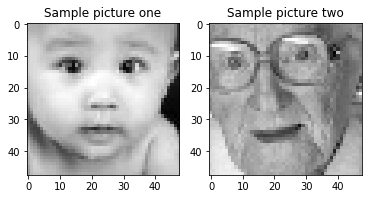

In [11]:
plt.subplot(1,2,1) # used for subplotting
plt.imshow(rX[0],cmap = "gray") # visualising the image
plt.title("Sample picture one") #assigning title to the image

plt.subplot(1,2,2) # used for subplotting of image 2 
plt.imshow(rX[-1],cmap = "gray") # visualing the image
plt.title("Sample picture two") # assigning a title.

In [12]:
# y = np.array(data["age"].tolist())
# print(y.shape)
# print(y)
y = data["age"].tolist()
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [13]:
# split the data set into train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 50)

In [14]:
print(x_train.shape)
# print(y_train.shape)

(18964, 48, 48, 1)


In [15]:
print(x_test.shape)
# print(y_test.shape)

(4741, 48, 48, 1)


In [16]:
from tensorflow.keras.applications import VGG16 # import the VGG16 base model
convbase = VGG16(weights=None,include_top=False,input_shape=(48,48,1)) # upload the model 
convbase.summary() # checks the architecture of the base model

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [17]:
# Building the model and adding output layer to the convolutional base
model = tf.keras.Sequential() # assign a sequential model
model.add(convbase) # adds the input and hidden layers to the sequential 
model.add(layers.Flatten()) # flattens the features from the hidden layer
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.summary() # checks the architecture of the base model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14713536  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 14,845,121
Trainable params: 14,845,121
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Generate augmentated data
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = test_datagen.flow(x_test, y_test,batch_size=32)


In [19]:
# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='mean_squared_error',
              metrics=['mae'])

In [20]:
# Fits the model with training and validation data
history = model.fit_generator(
      train_generator,
      steps_per_epoch=593,  # 18964 images = batch_size * steps
      epochs=100,
      validation_data=test_generator,
      validation_steps=149,  # 4741 images = batch_size * steps
      verbose=1) 

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


593/593 [==============================] - 31s 25ms/step - loss: 441.1321 - mae: 16.1801 - val_loss: 373.0898 - val_mae: 15.9597
Epoch 2/100
593/593 [==============================] - 14s 24ms/step - loss: 342.5877 - mae: 14.2701 - val_loss: 256.6365 - val_mae: 12.2739
Epoch 3/100
593/593 [==============================] - 14s 24ms/step - loss: 283.4096 - mae: 12.7934 - val_loss: 241.6979 - val_mae: 11.1582
Epoch 4/100
593/593 [==============================] - 14s 24ms/step - loss: 257.7868 - mae: 11.9560 - val_loss: 189.8993 - val_mae: 10.2814
Epoch 5/100
593/593 [==============================] - 14s 24ms/step - loss: 234.0000 - mae: 11.3619 - val_loss: 183.3378 - val_mae: 9.6499
Epoch 6/100
593/593 [==============================] - 14s 24ms/step - loss: 213.4481 - mae: 10.7660 - val_loss: 162.6040 - val_mae: 9.2310
Epoch 7/100
593/593 [==============================] - 14s 24ms/step - loss: 202.0720 - mae: 10.4259 - val_loss: 156.3036 - val_mae: 9.2358
Epoch 8/100
593/593 [=======

## Model Evaluation

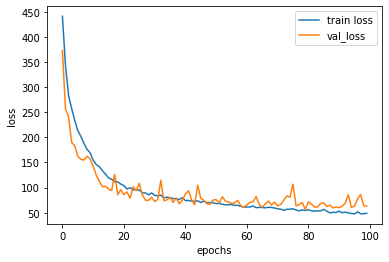

In [21]:
# Visualise the learning progress through the loss curve
plt.plot(history.history["loss"], label = "train loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.close()

Evaluating the model using real images

In [22]:
import cv2
def test_image(imagepath):
  image = cv2.imread(imagepath)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image,(48,48))
  plt.imshow(image,cmap="gray")
  image = image.reshape(1,48,48)
  pred = model.predict(np.array(image))
  print("Predicted Age:" + str(np.round(pred)))


Predicted Age:[[1.]]


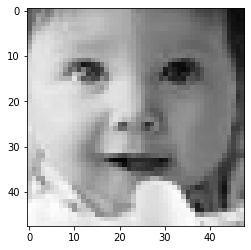

In [31]:
test_image("/content/gdrive/MyDrive/Image Processing/dataset/Age Categorized UTKFace/2/2_0_0_20170103202801736.jpg.chip.jpg")